In [71]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

directory = '../data/processed/'

file_pattern = '*.csv'
matching_files = glob.glob(directory + file_pattern)

if matching_files:
    first_matching_file = matching_files[0]
    df = pd.read_csv(first_matching_file, sep=';', decimal='.')
else:
    print("No CSV files found in the specified directory.")

df.head()

,name,company,technology,job,location_city,location_country,salary_low,salary_high,salary_currency,salary_avg,is_senior
0,senior cloud data engineer,SEB (Skandinaviska Enskilda Banken),Python,data engineer,warszawa,PL,30000,35000,PLN,32500.0,1
1,senior data engineer,SEB (Skandinaviska Enskilda Banken),Python,data engineer,warszawa,PL,34000,37000,PLN,35500.0,1
2,mid data engineer,Green Minds Sp.z o.o.,Python,data engineer,remote,NaN,25200,30240,PLN,27720.0,0
3,data engineer (snowflake),GetInData | Part of Xebia,Snowflake,data engineer,remote,NaN,18480,26880,PLN,22680.0,0
4,data engineer (dataiku/linkurious),Sopra Steria - Apps Services,Dataiku,data engineer,remote,NaN,16000,21000,PLN,18500.0,0


### How many job offers are available for each location?

In [72]:
job_positions = df['name'].value_counts()
job_positions

data engineer                                        9
senior data engineer                                 8
senior data scientist                                6
data analytics catalog engineer/analyst              4
data scientist                                       3
                                                    ..
internships in it - bsa, data analyst, ui, devops    1
analityk danych marketingowych                       1
iam platform operations analyst                      1
analityk baz danych oracle                           1
data platform engineer (infrastructure / dataops)    1
Name: name, Length: 71, dtype: int64

### What are the average earnings for individual professions?

In [73]:
job_types = df['job'].value_counts()
job_types

data engineer     60
data analyst      21
data scientist    19
Name: job, dtype: int64

In [74]:
df_groupby = df.groupby(by=['job','is_senior'])
df_groupby_mean = df_groupby['salary_avg'].mean()
earnings_df = df_groupby_mean.reset_index()
earnings_df

,job,is_senior,salary_avg
0,data analyst,0,14712.588235
1,data analyst,1,21928.750000
2,data engineer,0,22448.709302
3,data engineer,1,27688.500000
4,data scientist,0,20728.125000
5,data scientist,1,24585.954545


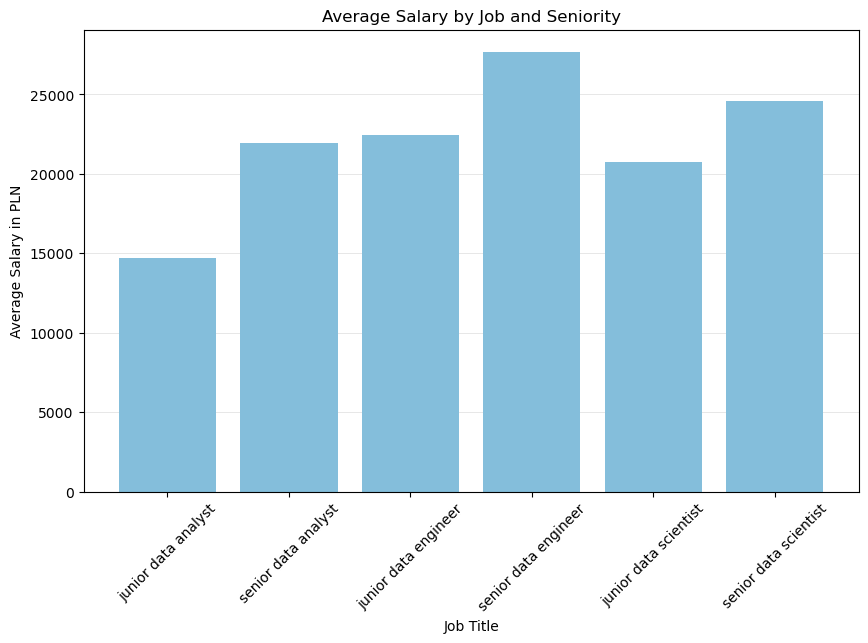

In [75]:
df_groupby_mean = df_groupby_mean.reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size

# Define the x-axis labels based on 'job' and 'is_senior' columns
x_labels = [f"{'senior' if is_senior else 'junior'} {job}" for job, is_senior in zip(earnings_df['job'], earnings_df['is_senior'])]

# Create the bar chart
plt.bar(x_labels, earnings_df['salary_avg'], color='#84bedb', zorder = 2)

# Add labels and title
plt.xlabel('Job Title')
plt.ylabel('Average Salary in PLN')
plt.title('Average Salary by Job and Seniority')

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=45)

plt.grid(which='major',axis='y', linestyle='-', linewidth='0.4',color='#D5D5D5', zorder = 1)
# Show the plot
plt.show()


### Which location has the most job offers?

In [76]:
job_types = df['location_city'].value_counts()
job_types_df = job_types.reset_index()
job_types_df

,index,location_city
0,remote,62
1,warszawa,21
2,kraków,4
3,budapest,4
4,prague,4
5,wrocław,3
6,katowice,2


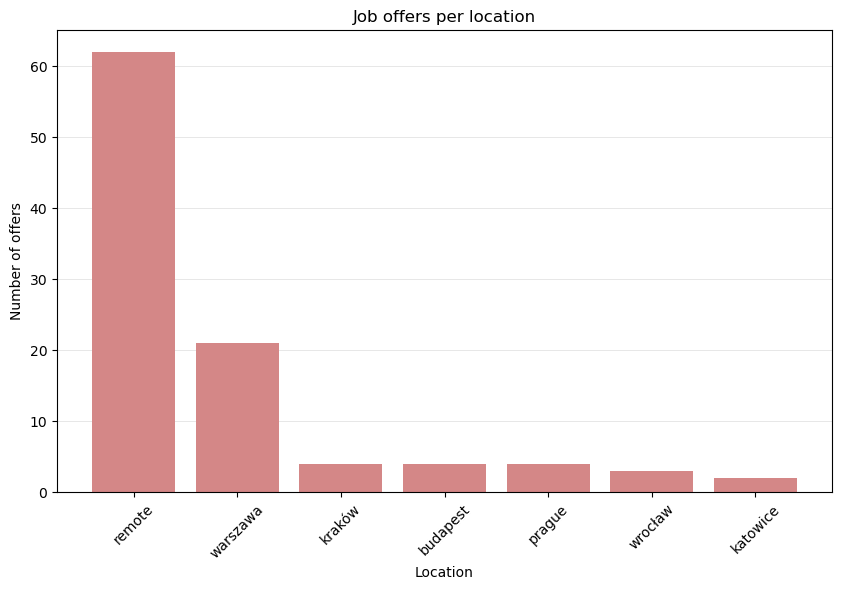

In [77]:
plt.figure(figsize=(10, 6))  # Set the figure size

x_labels = [f"{item}" for item in job_types_df['index']]

plt.bar(x_labels, job_types_df['location_city'] , color='#d48787', zorder = 2)

plt.xlabel('Location')
plt.ylabel('Number of offers')
plt.title('Job offers per location')

plt.xticks(rotation=45)

plt.grid(which='major',axis='y', linestyle='-', linewidth='0.4',color='#D5D5D5', zorder = 1)
plt.show()

### Where is the highest rate offered?

In [78]:
df_groupby_city = df.groupby(by=['location_city'])['salary_avg'].mean().sort_values(ascending=False)
new_df = df_groupby_city.reset_index()
new_df

,location_city,salary_avg
0,remote,23582.419355
1,warszawa,21443.642857
2,wrocław,19767.833333
3,kraków,19752.500000
4,prague,17309.000000
5,katowice,15250.000000
6,budapest,14905.625000


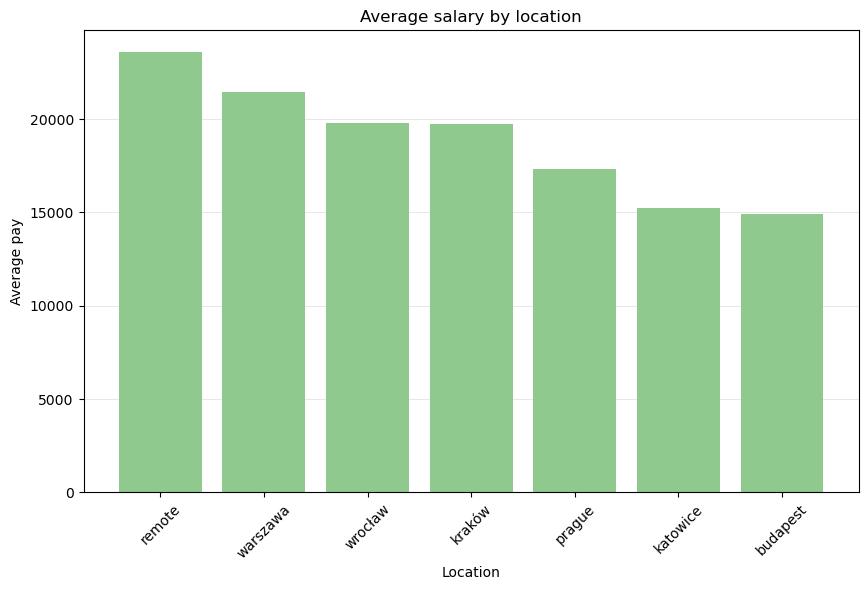

In [79]:
# Create a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size

# Define the x-axis labels based on 'job' and 'is_senior' columns
x_labels = [f"{item}" for item in new_df['location_city'].unique()]

# Create the bar chart
plt.bar(x_labels, new_df['salary_avg'], color='#90c98d', zorder = 2)

# Add labels and title
plt.xlabel('Location')
plt.ylabel('Average pay')
plt.title('Average salary by location')

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=45)

plt.grid(which='major',axis='y', linestyle='-', linewidth='0.4',color='#D5D5D5', zorder = 1)
# Show the plot
plt.show()


### What is the lowest possible cost of employing a team consisting of a data analyst, data engineer and data scientist?

In [80]:
df_groupby_job = df.groupby(by=['job'])['salary_low'].min()
df_groupby_job 

job
data analyst      3600
data engineer     9000
data scientist    7000
Name: salary_low, dtype: int64

In [81]:
min_cost = 0
for item in df_groupby_job:
    min_cost = min_cost + item
    
min_cost

19600

### Is it possible to establish a team in one city? If so, where would be the cheapest?

In [82]:
df_groupby_city = df.groupby(by=['location_city','job'])['salary_low'].min()
new_df2 = df_groupby_city.reset_index()
city_counts = new_df2['location_city'].value_counts()
filtered_cities = city_counts[city_counts == 3].index.tolist()
filtered_df = new_df2[new_df2['location_city'].isin(filtered_cities)]
lowest_cost = filtered_df.groupby(by="location_city")['salary_low'].sum()
lowest_cost

location_city
remote      25000
warszawa    36560
Name: salary_low, dtype: int64